In [19]:
import pandas as pd
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dataframe = pd.read_csv("Amazon_review.csv")
dataframe.head()

,Unnamed: 0,review,sentiment
0,1959029,I just adopted a chocolate lab who loves to sn...,1
1,971879,Watched it and wasn't very impressed. It was t...,0
2,44681,"By 1967, enough was enough with the light fluf...",0
3,793119,I was interested in what all the hype was abou...,0
4,2921599,I expected a well written book (as someone rec...,0


In [ ]:
dataframe.info()

In [22]:
dataframe = dataframe.drop_duplicates(subset=['review'], keep='first')

In [23]:
reviews = list(dataframe.review)
sentiment = list(dataframe.sentiment)

In [24]:
limit = 15000
reviews = reviews[:limit]
sentiment = sentiment[:limit]

In [25]:
training_size = int(limit * 0.8)
training_sentences = reviews[0:training_size]
testing_sentences = reviews[training_size:]
training_labels = sentiment[0:training_size]
testing_labels = sentiment[training_size:]

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

vocab_size = 20000
embedding_dim = 64
max_length = 100

In [27]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [28]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [33]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size , 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32 , return_sequences=  True)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])



In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

# Визначення моделі
model = Sequential()

# Додавання вбудовувального шару

model.add(Embedding(vocab_size, 128))



# Додавання Dense шарів
model.add(Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, activation='tanh')))

# Додавання Dense шарів
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Вихідний шар
model.add(Dense(units=1, activation='sigmoid'))

# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs,  batch_size=256, validation_data=(testing_padded, testing_labels), verbose=1)

In [60]:
model.evaluate(testing_padded, testing_labels)

94/94 [==============================] - 19s 201ms/step - loss: 0.5378 - accuracy: 0.8047


[0.5377988815307617, 0.8046666383743286]

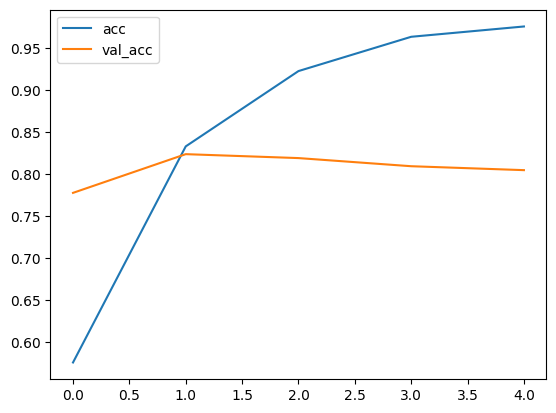

In [61]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

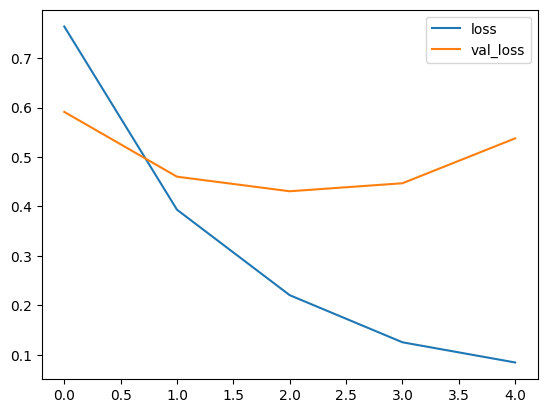

In [62]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()